# Session 2
**Targeted Topics**
* Why R.V.s
* Empirical Distributions   continued
* Mean and Variance of RVs


#Quick Recap

**Question?**
Why so much fuss about Random Variables?

We are giving numerical meaning to the events that we want to learn from!

We can use it in exploratory data analysis to understand how a particular variable typically behaves. This may help in making informed decisions.

Understanding this behavior can help us create models that sythesize this behaviour and help in making predictions about future.

So we can reperesent a feature in data with a RV and then understand its distribution.

#Mean and Variance of RVs

Mean Gives an idea of the central tendency

Variance Tells about the spread

With mean we can understand where we expect a typical value of the feature to lie. While variance will cover the diversity of this feature.

In other words, we can understand how likely an outcome is.

Eg. If we wish to study finanical data of employees, how likely it is for the employees to have Salary>50K

How likely a senior employee is a woman?

What is the salary range of employees. Do all employees get paid on similar scale?

Are women getting paid similar to their male counterparts.

***Mean of RV***

Notation:

mu
or 
E[X]

We will be using both notations interchangably

*   **Discrete RV**


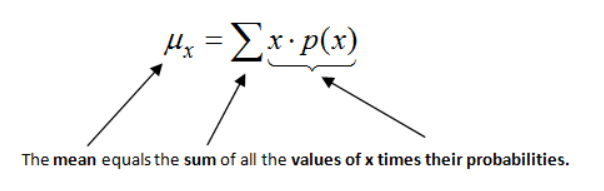
*   **Continuous RV**


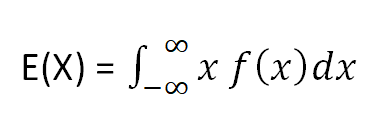



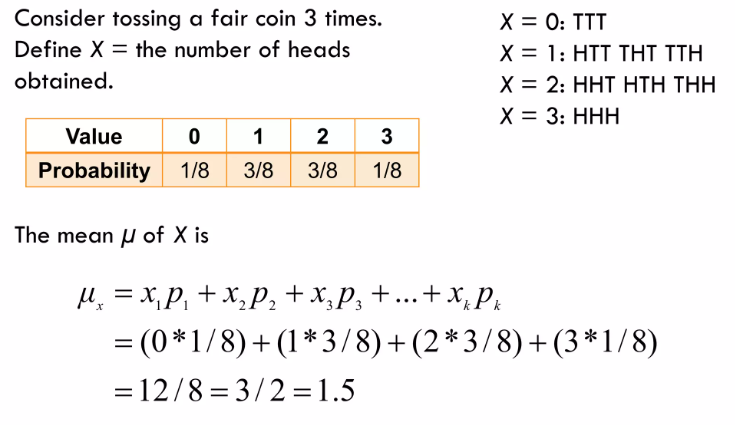

**Question**

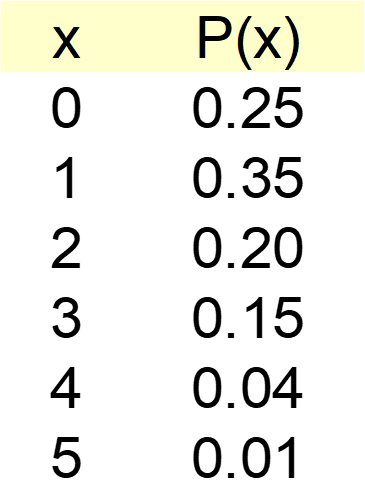

**Remember**

 Var(X)  =  E[X^2] - (E[X])^2

i.e.  Variance of R.V. X is mean of X square - sqaure of mean of X


Let's confirm!

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/LungCapData.csv")
df

In [ ]:
mean_height = df['Height'].mean()
mean_height

64.83627586206897

In [ ]:
var_height = df['Height'].var()
var_height

51.87087837683369

In [ ]:
(df['Height']*df['Height']).mean() - mean_height*mean_height

51.79933233769225

In [ ]:
mean_age = df['Age'].mean()
var_age = df['Age'].var()

mean_age

12.326896551724138

In [ ]:
(df['Age']*df['Age']).mean() - mean_age*mean_age

16.015897265160532

#Empirical Distribution


**Empirical Distribution**

An empirical distribution is one for which each possible event is assigned a probability derived from experimental observation. It is assumed that the events are independent and the sum of the probabilities is 1.



Why Empirical Distribution?

When we look at a R.V., we try to understand what is the probability that this R.V. will take?

But, sometimes the observations in a collected data sample do not fit any known probability distribution.

Thus, we need to use the empirical distribution.

The 'empirical distribution' refers to an empirical estimate of the cumulative distribution function.


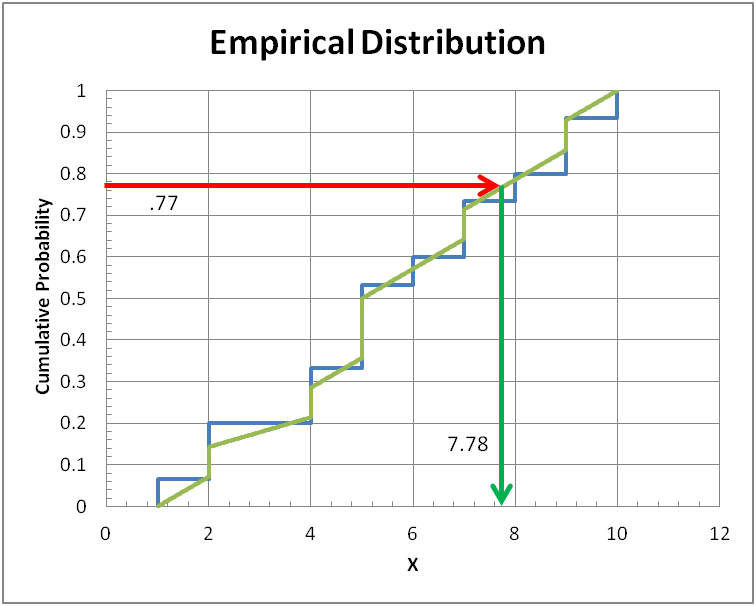


Assume for random variable X with values x1, x2, . . . xn+1 (**in order, with no two values being equal**).


i.e. x1 < x2 < x3 < ... xn+1


Empirical Distribution FnX is given by
* 0          for all values <  x1


* k/n        for X = xk+1 i.e. if k values are less than the given values of X


* 1          for X >= n+1        (here k=n)

**If two or more observations are equal**
say nk observations are equal at xk then FnX takes value

nk/n

An empirical cumulative distribution function is also known as Empirical Distribution Function, or EDF or Empirical Cumulative Distribution Function, or ECDF.


1. Order all the observations

2. EDF(X=x) = k / n    (where k is the number of values < x)

**Question**
A random sample of n = 8 people yields the following (ordered) counts of the number of times they swam in the past month:

 0    1    2    3    4    5    6    7

Calculate the empirical distribution function Fn(x).

FnX

For
 
*   0         for x <= 0

*   k/8      for 0 < xk < 7

*   1        for x >= 7



**Question**

A random sample of n = 8 people yields the following counts of the number of times they swam in the past month:

2 0 6 6 2 1 4 7

Calculate the empirical distribution function Fn(x).





*   Step 1: Order the observations


 0    1    2    2    4    6    6    7

*   Find ECDF

For 
x < 0   : 0


0 <= x < 1   : 1/8         (since 1 observation is less than 1)


1 <= x < 2   : 2/8         (since 2 observations are less than 2)


2 <= x < 4   :    


(2/8 accumulated from above) + 2/8    (since there are 2 2's)  = 4/8


4 <= x < 6 : 4/8 + 1/8   = 5/8      


6<= x <  7 : 5/8 + 2/8   =  7/8


\>= 7:        8/8          = 1




[Source](https://online.stat.psu.edu/stat415/lesson/empirical-distribution-functions)

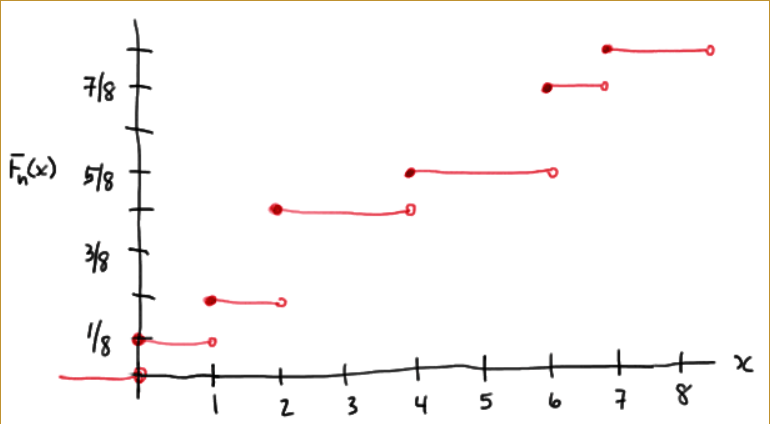

In [ ]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from numpy.random import normal
from numpy import hstack


Understanding the data which we know nothing about

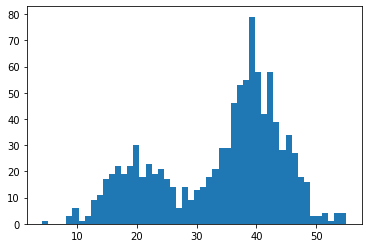

In [ ]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))
# plot the histogram
plt.hist(sample, bins=50)
plt.show()

In [ ]:
import statsmodels.api as sm 
#generating EDF from the above sample
ecdf = sm.distributions.ECDF(sample)

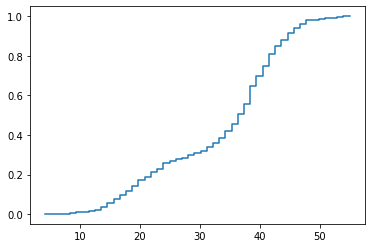

In [ ]:
x = np.linspace(min(sample), max(sample))
y = ecdf(x)
plt.step(x, y)
plt.show()

In [ ]:
# get cumulative probability for values
print('P(x<1): %.3f' % ecdf(1))
print('P(x<10): %.3f' % ecdf(10))
print('P(x<20): %.3f' % ecdf(20))
print('P(x<40): %.3f' % ecdf(40))
print('P(x<60): %.3f' % ecdf(60))

P(x<1): 0.000
P(x<10): 0.008
P(x<20): 0.151
P(x<40): 0.671
P(x<60): 1.000


In [ ]:
import pandas as pd
df = pd.read_csv("/content/LungCapData.csv")

In [ ]:
df

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no
...,...,...,...,...,...,...
720,5.725,9,56.0,no,female,no
721,9.050,18,72.0,yes,male,yes
722,3.850,11,60.5,yes,female,no
723,9.825,15,64.9,no,female,no


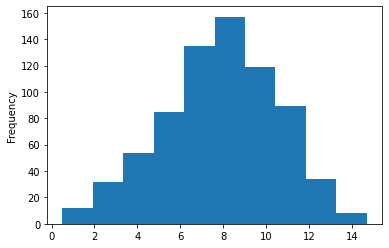

In [ ]:
df['LungCap'].plot(kind='hist')

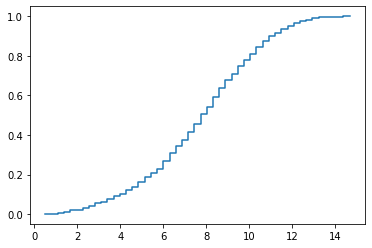

In [ ]:
#Find EDF of LungCap
ecdf = sm.distributions.ECDF(df['LungCap'])
x = np.linspace(df['LungCap'].min(), df['LungCap'].max())
y = ecdf(x)
plt.step(x, y)
plt.show()

In [ ]:
# get cumulative probability for values
print('P(x<0): %.3f' % ecdf(0))
print('P(x<2): %.3f' % ecdf(2))
print('P(x<4): %.3f' % ecdf(4))
print('P(x<6): %.3f' % ecdf(6))
print('P(x<8): %.3f' % ecdf(8))
print('P(x<10): %.3f' % ecdf(10))
print('P(x<12): %.3f' % ecdf(12))
print('P(x<14): %.3f' % ecdf(14))
print('P(x<15): %.3f' % ecdf(15))



P(x<0): 0.000
P(x<2): 0.021
P(x<4): 0.091
P(x<6): 0.230
P(x<8): 0.506
P(x<10): 0.775
P(x<12): 0.949
P(x<14): 0.996
P(x<15): 1.000


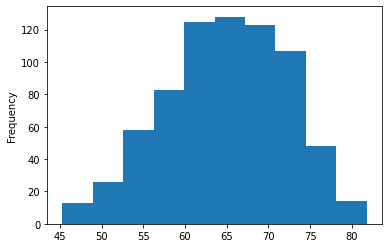

In [ ]:
df['Height'].plot(kind='hist')

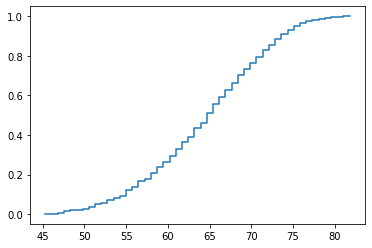

In [ ]:
#study the distribution of height
ecdf = sm.distributions.ECDF(df['Height'])
x = np.linspace(df['Height'].min(), df['Height'].max()) #evenly spaced samples in min and max range
y = ecdf(x)
plt.step(x, y)
plt.show()

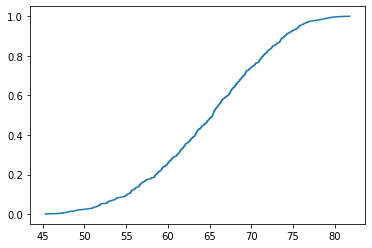

In [ ]:
#plotting CDF directly
plt.plot(ecdf.x,ecdf.y)
plt.show()

In [ ]:
# get cumulative probability for values
for i in range(int(df['Height'].min()),int(df['Height'].max())+5, 5):
  print('P(x< %s): %.3f'%(i, ecdf(i)))

  

P(x< 45): 0.000
P(x< 50): 0.025
P(x< 55): 0.095
P(x< 60): 0.259
P(x< 65): 0.484
P(x< 70): 0.742
P(x< 75): 0.928
P(x< 80): 0.996
P(x< 85): 1.000


Empirical Distribution Categorical Data

In [ ]:
df['Smoke'].value_counts(normalize=True)

no     0.893793
yes    0.106207
Name: Smoke, dtype: float64

In [ ]:
df['Smoke'].value_counts(normalize=True).loc[['no', 'yes']]

no     0.893793
yes    0.106207
Name: Smoke, dtype: float64

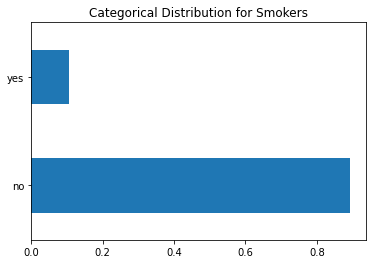

In [ ]:
df['Smoke'].value_counts(normalize=True).loc[['no', 'yes']].plot(kind='barh',title="Categorical Distribution for Smokers")

In [ ]:
distribution = df['Smoke'].value_counts(normalize=True)
distribution

no     0.893793
yes    0.106207
Name: Smoke, dtype: float64

In [ ]:
distribution.sort_values()

yes    0.106207
no     0.893793
Name: Smoke, dtype: float64

In [ ]:
distribution = distribution.sort_values()

In [ ]:
#to compute CDF in padas use cumsum()
#ensure that the values are sorted
cdf = distribution.sort_values().cumsum()

In [ ]:
cdf

yes    0.106207
no     1.000000
Name: Smoke, dtype: float64

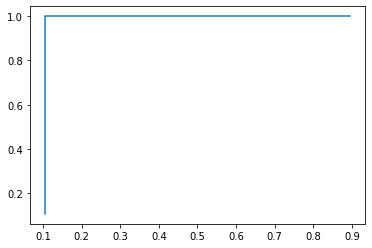

In [ ]:
plt.plot(distribution,cdf,ds='steps')

Can you interpret the above plot?

Working with ordinal data

In [ ]:
df['AgeGrp'] = pd.cut(x=df['Age'], 
                      bins=[0, 5, 10, 15, 20],
                      labels=['Baby/Toddler', 'Child', 'Teenager','Young Adult'])


In [ ]:
distribution = df['AgeGrp'].value_counts(normalize=True)
distribution

Teenager        0.434483
Child           0.267586
Young Adult     0.244138
Baby/Toddler    0.053793
Name: AgeGrp, dtype: float64

In [ ]:
distribution = distribution.sort_values() #remember to sort

#you can sort on indices too using sort_index() if index values  (here categories) represent order 
distribution

Baby/Toddler    0.053793
Young Adult     0.244138
Child           0.267586
Teenager        0.434483
Name: AgeGrp, dtype: float64

In [ ]:
cdf = distribution.cumsum()
cdf

Baby/Toddler    0.053793
Young Adult     0.297931
Child           0.565517
Teenager        1.000000
Name: AgeGrp, dtype: float64

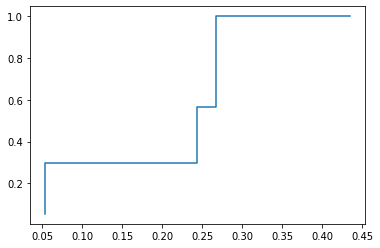

In [ ]:
plt.plot(distribution,cdf,ds='steps')


In [ ]:
#sort if index names are ordinal
#distribution.sort_index(ascending=True)

Baby/Toddler    0.053793
Child           0.267586
Teenager        0.434483
Young Adult     0.244138
Name: AgeGrp, dtype: float64

ECDF Plots using SEABORN

In [ ]:
import seaborn as sns

In [ ]:
df.columns

Index(['LungCap', 'Age', 'Height', 'Smoke', 'Gender', 'Caesarean', 'AgeGrp'], dtype='object')

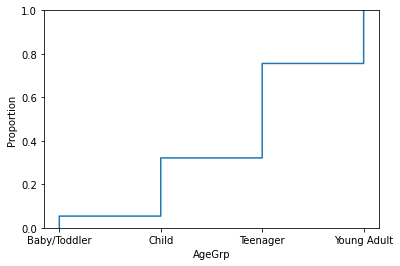

In [ ]:
sns.ecdfplot(data=df, x="AgeGrp")

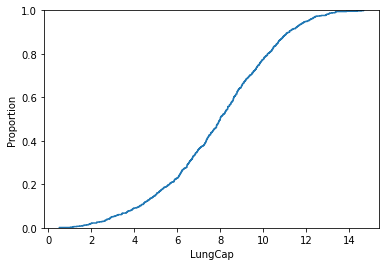

In [ ]:
sns.ecdfplot(data=df, x="LungCap")

Comparing different Categories

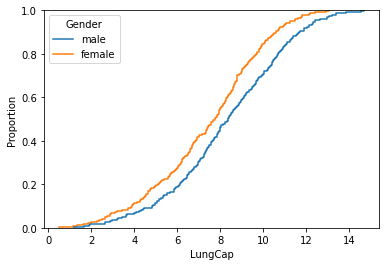

In [ ]:
sns.ecdfplot(data=df, x="LungCap",hue='Gender')

Question: What does the above plot say about male and female smokers?

Let's confirm our understanding with numbers

In [ ]:
fdf = df[df['Gender']=='female']
ecdf = sm.distributions.ECDF(fdf['LungCap'])
x = np.linspace(fdf['LungCap'].min(), fdf['LungCap'].max()) #evenly spaced samples in min and max range
y = ecdf(x)
# get cumulative probability for values
for i in range(int(fdf['LungCap'].min()),int(fdf['LungCap'].max())+2, 2):
  print('P(x< %s): %.3f'%(i, ecdf(i)))



P(x< 0): 0.000
P(x< 2): 0.025
P(x< 4): 0.115
P(x< 6): 0.274
P(x< 8): 0.550
P(x< 10): 0.846
P(x< 12): 0.978
P(x< 14): 1.000


In [ ]:
mdf = df[df['Gender']=='male']
ecdf = sm.distributions.ECDF(mdf['LungCap'])
x = np.linspace(mdf['LungCap'].min(), mdf['LungCap'].max()) #evenly spaced samples in min and max range
y = ecdf(x)
# get cumulative probability for values
for i in range(int(fdf['LungCap'].min()),int(mdf['LungCap'].max())+2, 2):
  print('P(x< %s): %.3f'%(i, ecdf(i)))



P(x< 0): 0.000
P(x< 2): 0.016
P(x< 4): 0.068
P(x< 6): 0.188
P(x< 8): 0.463
P(x< 10): 0.706
P(x< 12): 0.921
P(x< 14): 0.992
